# CESM2, ERA5 wind speed comparison

In [32]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import sys
import cmocean
sys.path.append('/home/users/birgal/')
time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)

# %load_ext line_profiler

In [2]:
base_dir   = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
era5_dir   = f'{base_dir}ERA5-forcing/climatology/'
cesm2_dir  = f'{base_dir}climate-forcing/CESM2/LE2/ensemble_mean/'

mesh_mask  = xr.open_dataset(f'{base_dir}bathymetry/mesh_mask-20250715.nc').squeeze().isel(nav_lev=0)
domcfg     = xr.open_dataset(f'{base_dir}bathymetry/domain_cfg-20250715.nc').squeeze()
distcoast  = xr.open_dataset(f'{base_dir}bathymetry/distance_coast-20250715.nc')

ERA5_snow  = xr.open_dataset(f'{era5_dir}ERA5_eANT025_msr_daily_1979-2024_mean_monthly.nc').where(mesh_mask.tmask!=0)
CESM2_snow = xr.open_dataset(f'{cesm2_dir}CESM2-LE2_eANT025_PRECS_daily_ensemble_1979-2024_mean_monthly.nc').where(mesh_mask.tmask!=0)
ERA5_ppt   = xr.open_dataset(f'{era5_dir}ERA5_eANT025_mtpr_daily_1979-2024_mean_monthly.nc').where(mesh_mask.tmask!=0)
CESM2_ppt  = xr.open_dataset(f'{cesm2_dir}CESM2-LE2_eANT025_PRECT_daily_ensemble_1979-2024_mean_monthly.nc').where(mesh_mask.tmask!=0)

CESM2_snow_corr = xr.open_dataset(f'{cesm2_dir}bias_corr/CESM2-LE2_PRECS_daily_bias_corr_monthly.nc').where(mesh_mask.tmask!=0)
CESM2_ppt_corr  = xr.open_dataset(f'{cesm2_dir}bias_corr/CESM2-LE2_PRECT_daily_bias_corr_monthly.nc').where(mesh_mask.tmask!=0)

In [38]:
bias_corr_CESM2_snow = xr.open_mfdataset(f'{cesm2_dir}../bias-corrected/ens1011.001/base/CESM2-LE2_ens1011.001_eANT025_daily_PRECS_bias_corr_monthly_y192*.nc')#.PRECS.groupby('time_counter.month').mean()
# bias_corr_CESM2_ppt  = xr.open_mfdataset(f'{cesm2_dir}../bias-corrected/ens1011.001/base/CESM2-LE2_ens1011.001_eANT025_daily_PRECT_bias_corr_monthly_y192*.nc').PRECT.groupby('time_counter.month').mean()

/tmp/ipykernel_1818/2268459556.py:1: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  bias_corr_CESM2_snow = xr.open_mfdataset(f'{cesm2_dir}../bias-corrected/ens1011.001/base/CESM2-LE2_ens1011.001_eANT025_daily_PRECS_bias_corr_monthly_y192*.nc')#.PRECS.groupby('time_counter.month').mean()
/tmp/ipykernel_1818/2268459556.py:1: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  bias_corr_CESM2_snow = xr.open_mfdataset(f'{cesm2_dir}../bias-corrected/ens1011.001/base/CESM2-LE2_ens1011.001_eANT025_daily_PRECS_bias_corr_monthly_y192*.nc')#.PRECS.groupby('time_counter.month').mean(

ValueError: Every dimension requires a corresponding 1D coordinate and index for inferring concatenation order but the coordinate 'y' has no corresponding index

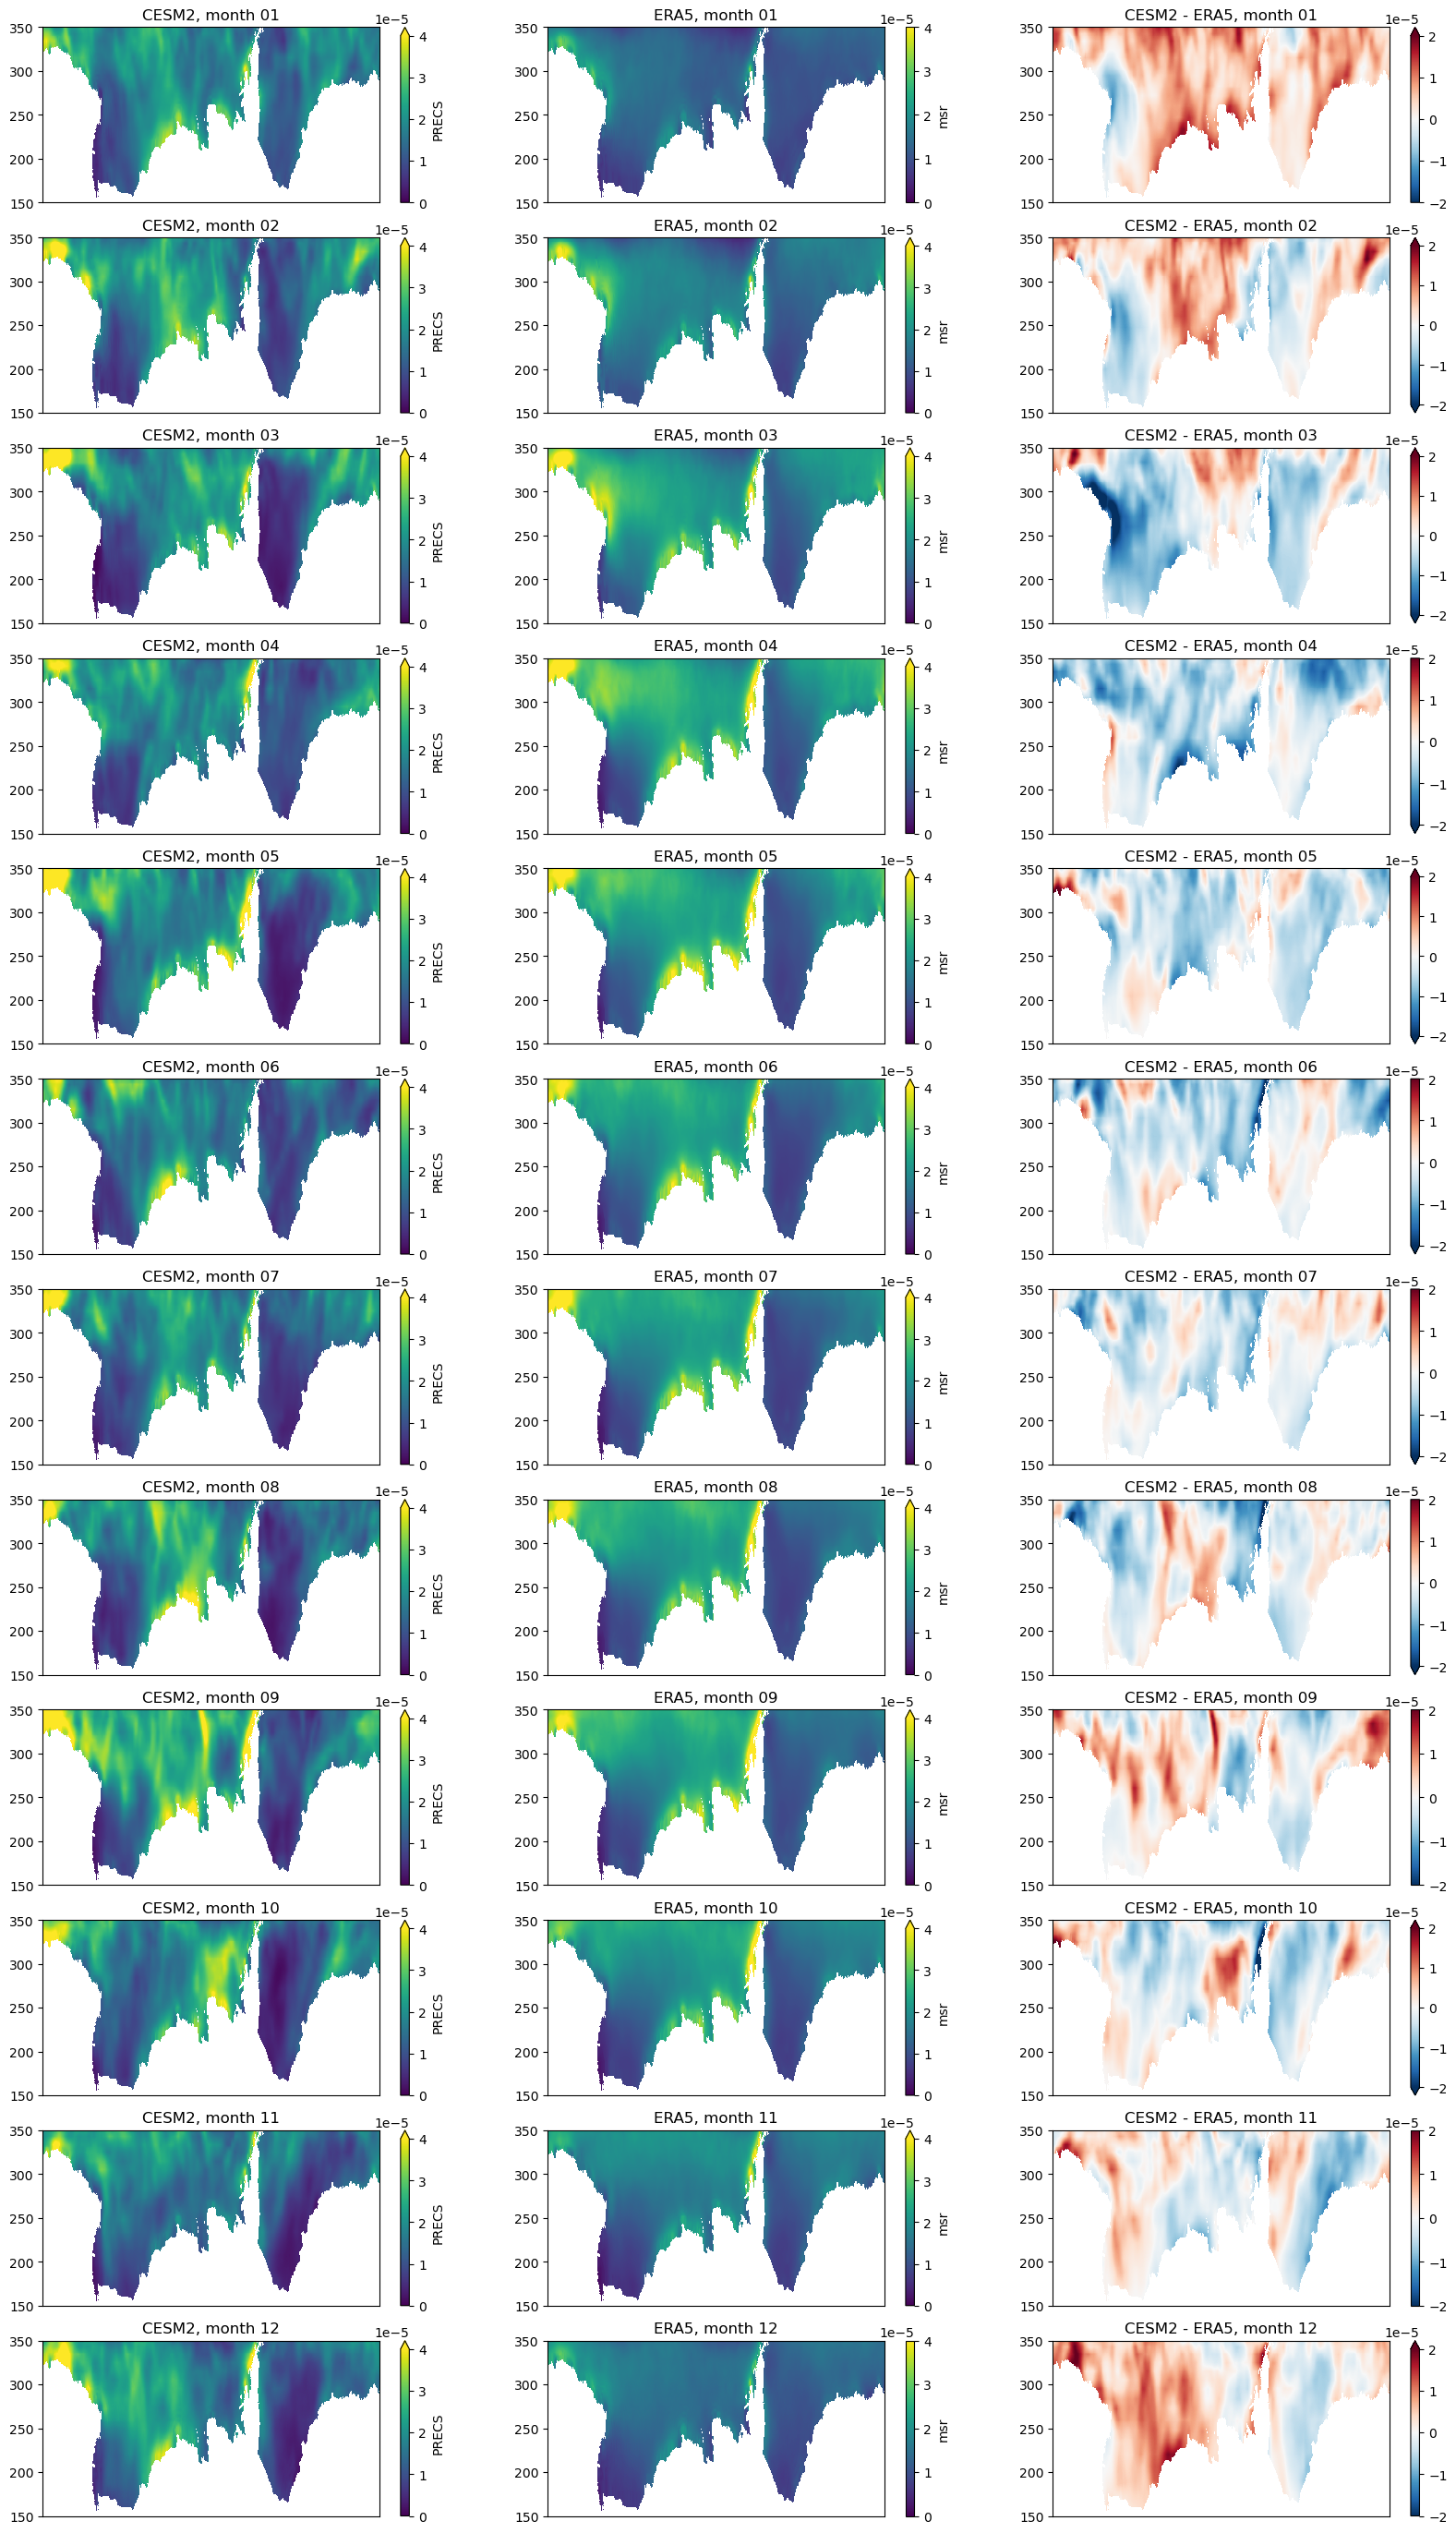

In [33]:
fig, ax = plt.subplots(12,3,figsize=(20,35))

for m, month in enumerate(range(0,12)):
    bias_corr_CESM2_snow['PRECS'].where(mesh_mask.tmask!=0).isel(month=month).plot(ax=ax[m,0], vmin=0, vmax=4e-5)
    ERA5_snow['msr'].isel(month=month).plot(ax=ax[m,1], vmin=0, vmax=4e-5)
    (bias_corr_CESM2_snow['PRECS'].isel(month=month) - ERA5_snow['msr'].isel(month=month)).plot(ax=ax[m,2], cmap='RdBu_r', vmin=-2e-5, vmax=2e-5)
    
    ax[m,0].set_title(f'CESM2, month {m+1:02}')
    ax[m,1].set_title(f'ERA5, month {m+1:02}')
    ax[m,2].set_title(f'CESM2 - ERA5, month {m+1:02}')
    
for axis in ax.ravel():
    axis.set_xlabel(''); axis.set_ylabel('');
    axis.set_xticks([])
    axis.set_xlim(200, 1300)
    axis.set_ylim(150, 350)

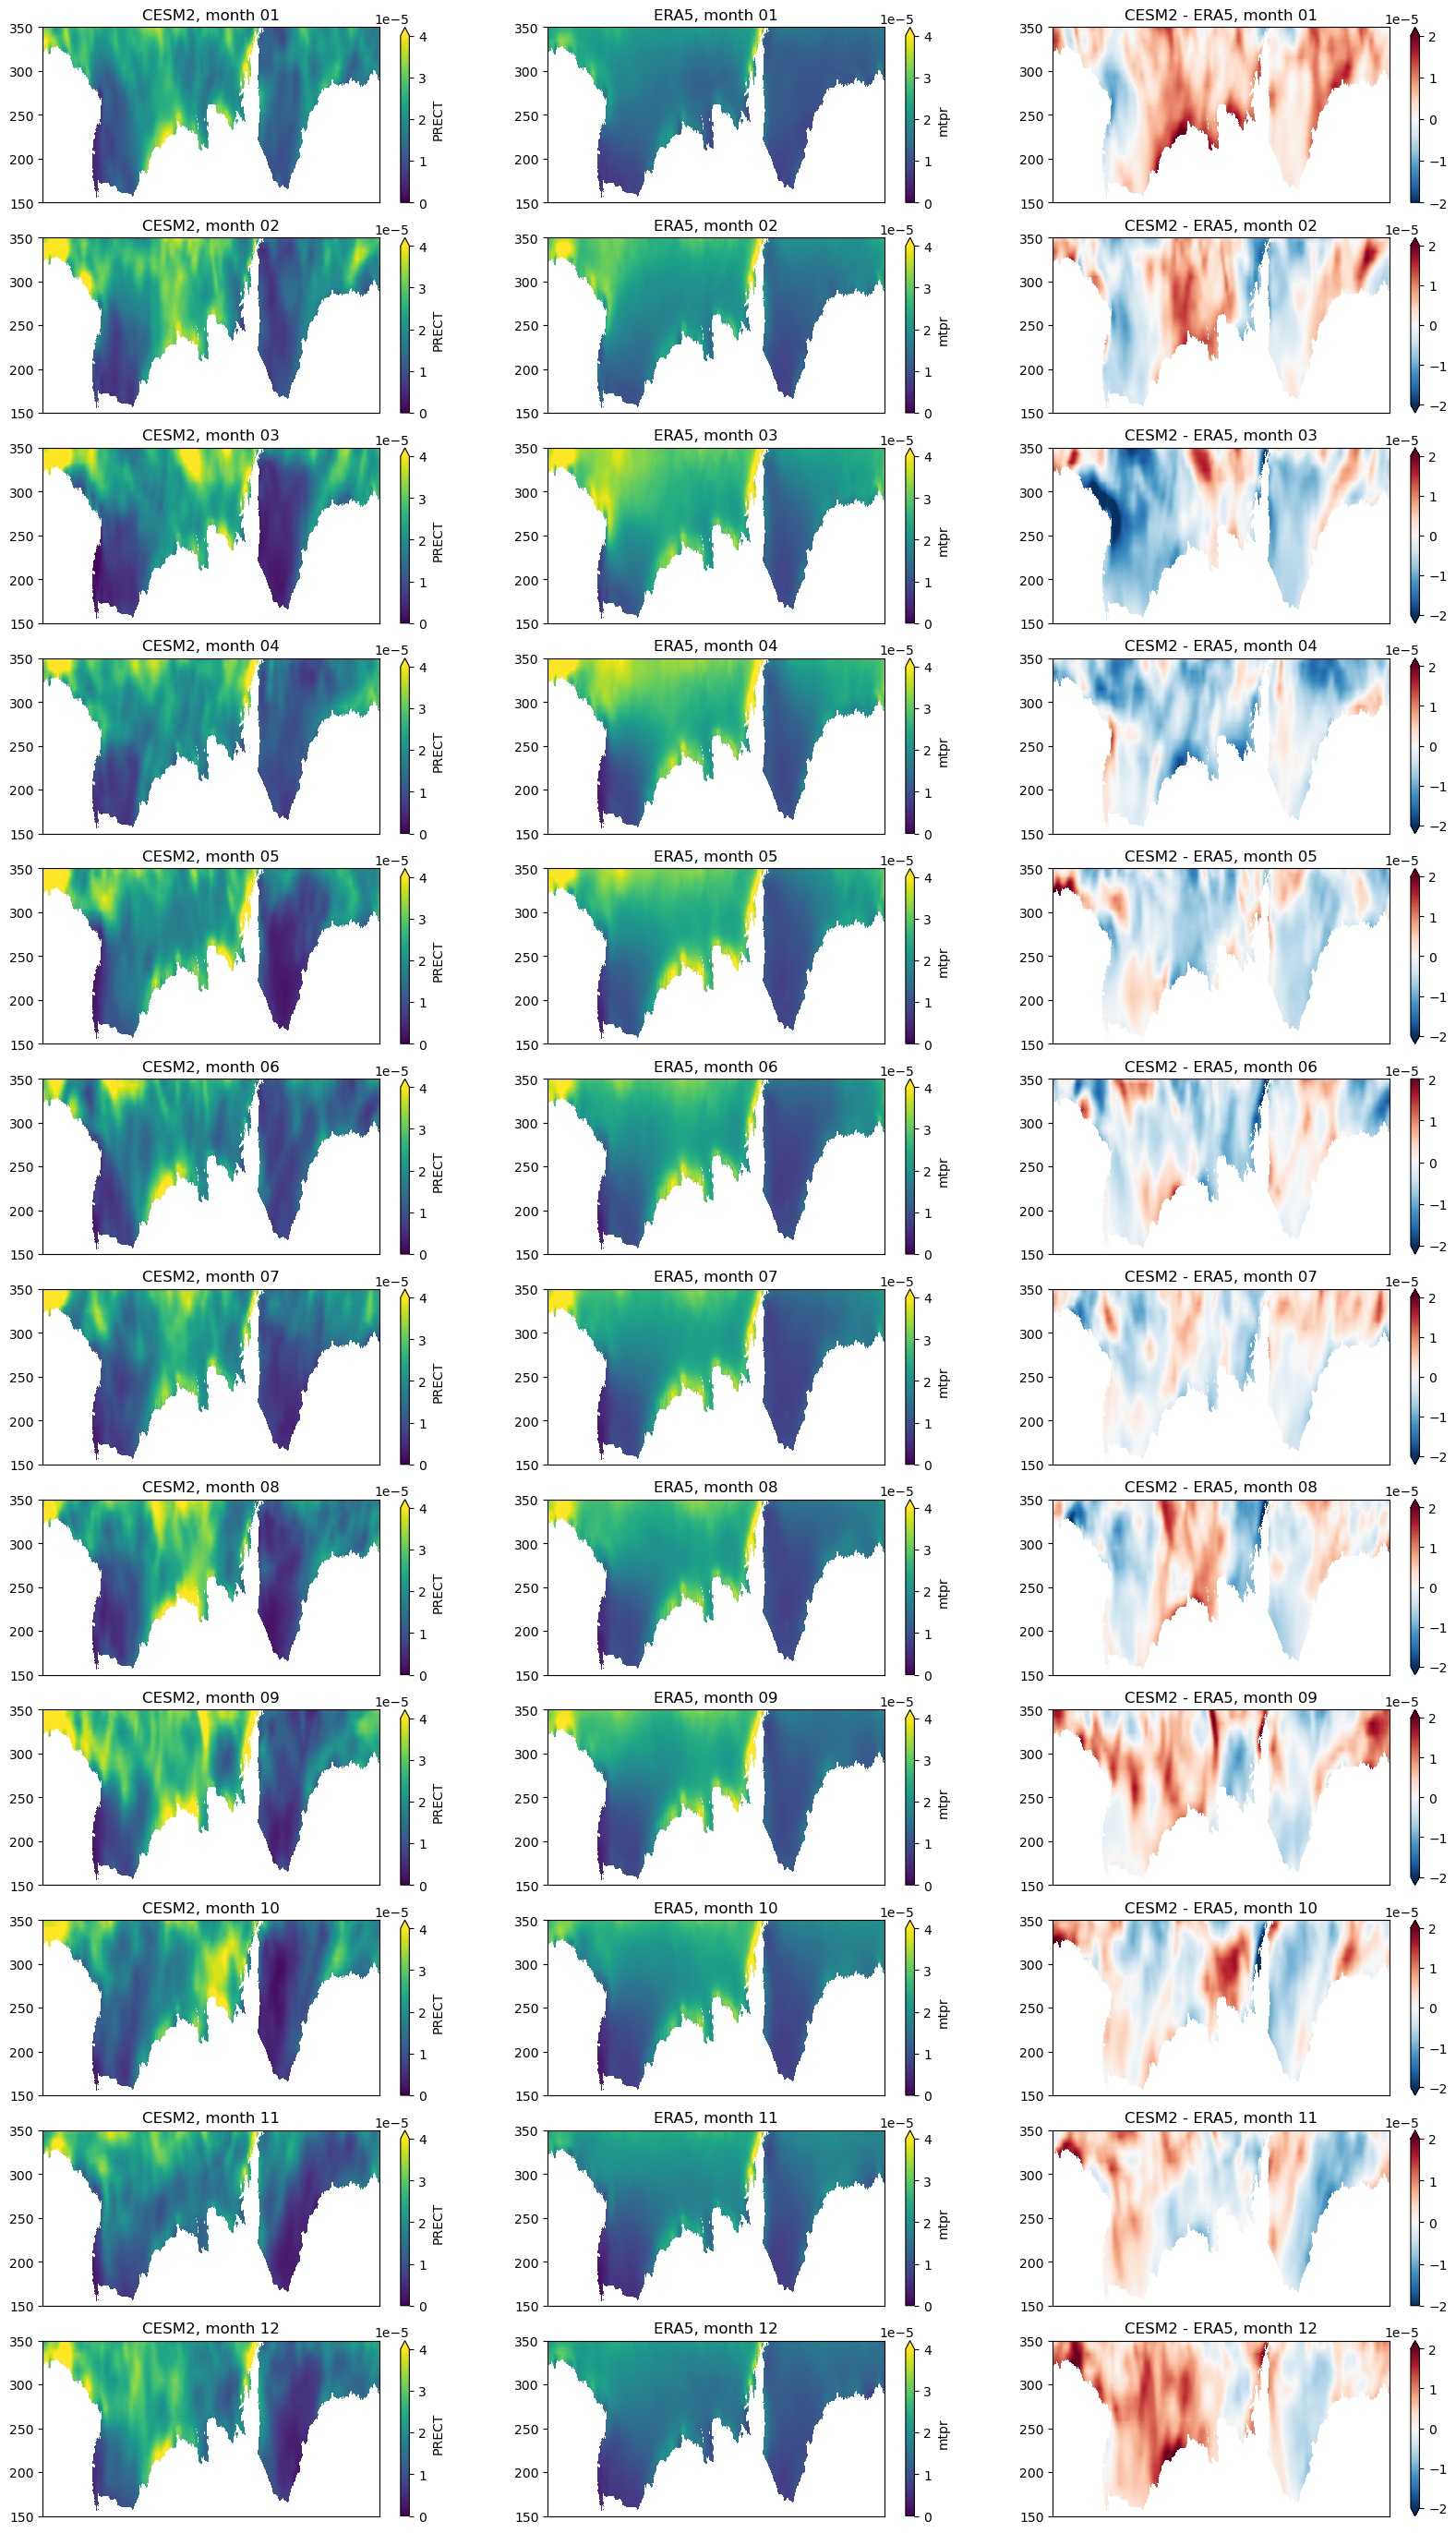

In [34]:
fig, ax = plt.subplots(12,3,figsize=(20,35))

for m, month in enumerate(range(0,12)):
    bias_corr_CESM2_ppt['PRECT'].where(mesh_mask.tmask!=0).isel(month=month).plot(ax=ax[m,0], vmin=0, vmax=4e-5)
    ERA5_ppt['mtpr'].isel(month=month).plot(ax=ax[m,1], vmin=0, vmax=4e-5)
    (bias_corr_CESM2_ppt['PRECT'].isel(month=month) - ERA5_ppt['mtpr'].isel(month=month)).plot(ax=ax[m,2], cmap='RdBu_r', vmin=-2e-5, vmax=2e-5)
    
    ax[m,0].set_title(f'CESM2, month {m+1:02}')
    ax[m,1].set_title(f'ERA5, month {m+1:02}')
    ax[m,2].set_title(f'CESM2 - ERA5, month {m+1:02}')
    
for axis in ax.ravel():
    axis.set_xlabel(''); axis.set_ylabel('');
    axis.set_xticks([])
    axis.set_xlim(200, 1300)
    axis.set_ylim(150, 350)